# Reinforcement Learning 

Reinforcement Learning is the cutting-edge approach in artificial intelligence that empowers machines to learn by interacting with their environment. Just like a skillful player mastering a game, this innovative technique enables AI to make smart decisions and improve performance through trial and error. By rewarding positive outcomes and penalising mistakes, Reinforcement Learning paves the way for autonomous agents that learn to navigate complex challenges and conquer the unknown.

<hr style="border:2px solid gray">

## Index: <a id='index'></a>
1. [Reward System](#reward-system)
1. [Q-Learn](#QL)

## Real life example:
AlphaGo, the revolutionary AI developed by DeepMind, employs Reinforcement Learning as a crucial component of its strategy. Through a combination of supervised learning from human expert games and reinforcement learning by playing against itself, AlphaGo hones its skills and adapts its gameplay. This reinforcement learning process allows AlphaGo to refine its moves, prioritise winning strategies, and continuously evolve, eventually achieving superhuman proficiency in the intricate game of Go. The result is a monumental breakthrough in the world of AI and a testament to the power of Reinforcement Learning in conquering complex challenges. 

## In this notebook...

we will go through a simple example of reinforcement learning.

A game of rock paper scissors is designed, you may try to write your own example to implement a simple game.

What we want is to let you the player choose an option and the computer to also do the same thing, then we decide if you or the player has won the game:

<div style="background-color: #FFF8C6">

## Exercise: Write your version of this implementation...

The set of code below is a version of implementation:

In [4]:
import random
import numpy as np


#### This is how a basic one to one game of rock paper and scissors work
def users_choice():
    print("Let's play rock, paper, scissors")
    while True:
        choice = input("Enter your choice (rock, paper, or scissors): ")
        if choice in ["rock", "paper", "scissors"]:
            return choice
        else:
            print("Invalid choice. Try again.")


def comp_trial():
    options = ["rock", "paper", "scissors"]
    choice = random.choice(options)
    return choice


def rule(user_choice, comp_choice):
    '''
    This shows all the outcomes of the game,
    the if statements can be shortened to three
    '''
    if user_choice == comp_choice:
        return "draw"
    elif user_choice == "rock" and comp_choice == "scissors":
        return "user wins"
    elif user_choice == "scissors" and comp_choice == "rock":
        return "computer wins"
    elif user_choice == "paper" and comp_choice == "rock":
        return "user wins"
    elif user_choice == "rock" and comp_choice == "paper":
        return "computer wins"
    elif user_choice == "scissors" and comp_choice == "paper":
        return "user wins"
    elif user_choice == "paper" and comp_choice == "scissors":
        return "computer wins"


comp_choice = comp_trial()
user_choice = users_choice()


print("Your choice:", user_choice)
print("I will choose:", comp_choice)

result = rule(user_choice, comp_choice)
print(result)

Let's play rock, paper, scissors
Your choice: rock
I will choose: scissors
user wins


## Adding a reward system  [^](#index)
<a id='reward-system'></a>

The idea of reinforcement learning is about letting the machine know what outcomes is the outcome that we want to see. To do this we can set up a reward system:

Here I want the player to win the game and I will let the code know this by adding in a reward system. In this section we are implementing a reward system and the machine will append these values to be assessed.

The game is still being played randomly. How should we then use the statistics to train the model to play the way we want. In this case, play to let the player win.

In [2]:
import random
import numpy as np


def users_choice():

    print("Let's play rock, paper, scissors")
    while True:
        choice = input("Enter your choice (rock, paper, or scissors): ")
        if choice in ["rock", "paper", "scissors"]:
            return choice
        else:
            print("Invalid choice. Try again.")


def comp_trial():
    options = ["rock", "paper", "scissors"]
    choice = random.choice(options)
    return choice


def get_reward(user_choice, comp_choice):
    if user_choice == comp_choice:
        return 0  # Draw
    elif (
        (user_choice == "rock" and comp_choice == "scissors")
        or (user_choice == "scissors" and comp_choice == "paper")
        or (user_choice == "paper" and comp_choice == "rock")
    ):
        return 1  # Win
    else:
        return -1  # Lose


def play_game():
    user_choice = users_choice()
    comp_choice = comp_trial()

    print("Your choice:", user_choice)
    print("I will choose:", comp_choice)

    reward = get_reward(user_choice, comp_choice)
    return reward


num_episodes = 15
total_reward = 0

for episode in range(num_episodes):
    reward = play_game()
    total_reward += reward

# visualise reward, so far we are not using the reward yet
average_reward = total_reward / num_episodes
print("Average Reward over {} episodes: {}".format(num_episodes, average_reward))

# Reinforcement Learning in Action

Let's discuss the concept of reinforcement learning further using this game.

In this game, the game can be considered as the **environment**. The hand you choose to play: `input("Enter your choice (rock, paper, or scissors): ")` is the **state**.

The computer who plays against you the player is the **agent** and the **state** represents the current situation or configuration of the **environment** that the **agent** observes. In the case of the rock-paper-scissors game, the state is not just the hand you choose to play `["rock, "paper, "scissors"]`, but it also includes the computer's hand, as it influences the outcome of the game. So, the **state** is a combination of both your hand and the opponent's hand.

After this transition, the **agent** receives a penalty or reward - with winning bringing a `+1` reward, losing bringing a `-1` penalty and drawing being a neutral action.

The **policy** is then the strategy of choosing an action that gives better outcomes considering the reward system. It's a mapping from states to actions, indicating what action the agent should take in a given state. The policy can be deterministic, meaning it always chooses the same action in a specific state, or it can be stochastic, where it selects actions probabilistically. 

How willing the code is to selecting actions randomly/exploring different routes, would be determined by **Epsilon-Greedy exploration** - a technique used to balance exploration and exploitation during the agent's learning process. The agent uses an exploration rate (`epsilon`) to decide whether to explore a new action randomly or exploit the current best action according to the Q-values.

<img src="https://www.learndatasci.com/documents/14/Reinforcement-Learning-Animation.gif" alt="Reinforcement Learning Animation">


# Q-Learning


Here, we implement Q-learning to enable the agent (player) to learn the best actions to take in different states. The agent uses the environment's rewards to update the Q-values over time.

The Q-table is a dictionary that maps a `(state, action)` combination to the corresponding Q-value. Each Q-value represents the "quality" of the action taken from a specific state. Higher Q-values imply better chances of obtaining greater rewards from that action.

For example, the Q-table will have entries like, with the reward system implemented:

<center>

|          State         |  Action  |  Q-Value  |
|------------------------|----------|----------|
|    Rock, Opponent=Rock  |  Rock    |   0.0    |
|    Rock, Opponent=Rock  |  Paper   |  -1.0    |
|    Rock, Opponent=Rock  | Scissors |   1.0    |
|    Rock, Opponent=Paper |  Rock    |   1.0    |
|    Rock, Opponent=Paper |  Paper   |   0.0    |
|    Rock, Opponent=Paper | Scissors |  -1.0    |
| Rock, Opponent=Scissors |  Rock    |  -1.0    |
| Rock, Opponent=Scissors |  Paper   |   1.0    |
| Rock, Opponent=Scissors | Scissors |   0.0    |
|           ...          |   ...    |   ...    |

</center>


In this table, the rows represent different states (e.g., "Rock, Opponent=Rock" indicating that the agent chose Rock, and the opponent also chose Rock), the columns represent the available actions (Rock, Paper, Scissors), and the values represent the corresponding Q-values.

As the agent explores and interacts with the environment, it updates the Q-values based on the rewards obtained, and future actions are influenced by these Q-values, guiding the agent towards making better decisions in the game.


## Q-values are updated using the following equation:

$$
Q(s, a) = Q(s, a) + α * [R(s, a) + γ * max(Q(s', a')) - Q(s, a)]
$$

- `Q(s, a)` is the Q-value of the (state, action) pair.
α (alpha) is the learning rate, controlling the impact of new information on the Q-value updates ($0≤α≤1$).
- `R(s, a)` is the immediate reward obtained when taking action a in state s.
- `γ (gamma)` is the discount factor, determining the importance of future rewards ($0≤γ≤1$).
- `max(Q(s', a'))` is the maximum Q-value among all possible actions `a'` in the next state `s'`.
- `s'` is the next state after taking action a in state `s`.

This Q-value update equation is fundamental to the Q-learning algorithm, allowing the agent to iteratively adjust its Q-values based on the rewards received and the expected maximum future reward from the next state. As the agent explores and interacts with the environment, the Q-values converge to optimal values, guiding the agent towards making better decisions and maximizing cumulative rewards. The learning rate `(α)` and discount factor `(γ)` are hyper-parameters that can be tuned to control the learning process in different environments.

## Introduction to Dictionaries in Python

In Python, a dictionary is a powerful and flexible data structure that allows you to store key-value pairs. It is denoted by curly braces `{}` and consists of keys separated from their corresponding values by a colon `:`. Each key-value pair represents an item in the dictionary. Dictionaries are particularly useful when dealing with data that requires fast and efficient lookup based on unique keys.

## Q-Table for the Rock-Paper-Scissors Game

In Python dictionaries, including the Q-table, there is no inherent order to the keys. Dictionaries are implemented as hash tables, which are data structures optimised for fast lookup based on keys rather than maintaining a specific order.

In the context of the Rock-Paper-Scissors game, we use a dictionary to represent the Q-table. The Q-table maps each `(state, action)` combination to its corresponding Q-value. Here's how we can create the Q-table using a dictionary:

```python
q_table = {
    ("Rock", "Rock"): 0.0,
    ("Rock", "Paper"): -1.0,
    ("Rock", "Scissors"): 1.0,
    ("Paper", "Rock"): 1.0,
    ("Paper", "Paper"): 0.0,
    ("Paper", "Scissors"): -1.0,
    ("Scissors", "Rock"): -1.0,
    ("Scissors", "Paper"): 1.0,
    ("Scissors", "Scissors"): 0.0
}
```

We can create the the Q_table into a class


In [17]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
class QTable:
    def __init__(self, states, actions):
        '''
        This initialises the q_table as a 3*3 with all the states and actions
        A Q-table is created as a dictionary with the key being the state and action and the value being the q_value
        '''
        self.states = states
        self.actions = actions
        self.q_table = {
            (state, action): 0 for state in self.states for action in self.actions
        }

    def get_q_value(self, state, action):
        '''
        The `get_q_value` method is a function that takes in a state and an action as parameters and returns the 
        corresponding q-value from the q_table. If the q-value does not exist in the q_table, it returns 0 as a 
        default value.
        '''
        return self.q_table.get((state, action), 0)


    def update_qvalue(self, state, action, reward, alpha, gamma):
        '''
        The `update_qvalue` method in the `QTable` class is used to update the Q-value in the Q-table based on the
        given state, action, reward, learning rate (alpha), and discount factor (gamma).
        '''
        old_q_value = self.get_q_value(state, action) # access the old q_value
        next_max = max(
            [self.get_q_value(state, next_action) for next_action in self.actions]
        ) # find the next max q_value - method to find the most optimal action
        new_q_value = (1 - alpha) * old_q_value + alpha * (reward + gamma * next_max) # q-table update equation
        self.q_table[(state, action)] = new_q_value


states = ["rock", "paper", "scissors"]
actions = ["rock", "paper", "scissors"]
q_table = QTable(states, actions)
num_episodes = int(1000) # loop the game 1000 times

The user function plays the hand randomly, so we can train the computer to play for a large number episode.

In [25]:
def user_choice():
    choice = random.choice(states)
    return choice


Here we introduce epsilon, and the epsilon greedy value.

In the `comp_choice()` function, we access the hyperparameter `epsilon`. The first if statement generates a random number between 0 and 1, and if the value generated is below the epsilon value, we prompt the computer to make a random move so the q_table's q_value can explored further. Else, if the randomly generated number is greater than epsilon, the computer uses its learning outcome from the q_table and play the best possible hand.

In [26]:
def comp_choice(state, epsilon):
    '''
    This code is implementing the epsilon-greedy strategy for selecting an action.
    '''
    if random.uniform(0, 1) < epsilon:
        action = random.choice(actions)
    else:
        q_values = [q_table.get_q_value(state, action) for action in actions]
        action = actions[np.argmax(q_values)]
    return action


def get_state(user_choice, comp_choice):
    return (user_choice, comp_choice)

## Document Reward System

Here, a dictionary is used to document successes and failures. 

In [27]:
results_dict = {
    ("rock", "rock"): 0.0,
    ("rock", "paper"): -1.0,
    ("rock", "scissors"): 1.0,
    ("paper", "rock"): 1.0,
    ("paper", "paper"): 0.0,
    ("paper", "scissors"): -1.0,
    ("scissors", "rock"): -1.0,
    ("scissors", "paper"): 1.0,
    ("scissors", "scissors"): 0.0,
}

document_result = []


def reward(user_choice, comp_choice):
    result = results_dict[(user_choice, comp_choice)]
    document_result.append(result)
    return result

Finally, we loop the game for the num_episodes to train the computer to let the player win the game.

In [28]:
list_of_user_input = []
list_of_comp_input = []
contin_reward = []


def game_loop(alpha, gamma, epsilon, num_episodes):
    total_reward = 0
    for episode in range(num_episodes):
        # Decay the hyperparameter(s)
        epsilon *= np.exp(-e_decay_rate * episode)

        state = user_choice()
        action = comp_choice(state, epsilon)

        # visualising results
        list_of_user_input.append(state)
        list_of_comp_input.append(action)
        reward_val = reward(state, action)
        total_reward += reward_val
        contin_reward.append(total_reward)

        q_table.update_qvalue(state, action, reward_val, alpha, gamma)
    return contin_reward

## Hyper-parameters

Q_table usually takes 3 hyper-parameters: `alpha`, `gamma` and `epsilon`, as explained above. 

A decay factor is a simple way to change the hyperparameter according to the progress of learning. Here we start by making half of the computer's decisions random, by setting `epsilon = 0.5`, then by making the `epsilon` value decay to approach 0, the computer can minimise random decisions makings as the q_table updates.

As the `e_decay_rate` decreases exponentially it can also be considered as a hyper-parameter (it's not a constant).


In [29]:
alpha = 0.3  # learning rate
gamma = 0.9  # discount factor
epsilon = 0.5  # exploration rate

e_decay_rate = 1 / num_episodes


## Visualising Result

Plotting diagrams and displaying tables can aid your understanding on how your code is performing.

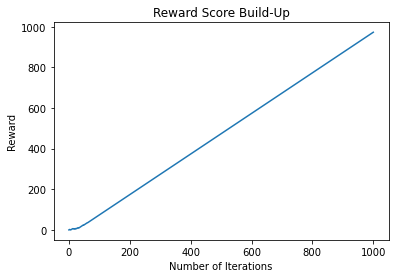

    Player's Choices Computer's Choices  Result
990            paper               rock     1.0
991            paper               rock     1.0
992             rock           scissors     1.0
993         scissors              paper     1.0
994             rock           scissors     1.0
995             rock           scissors     1.0
996             rock           scissors     1.0
997            paper               rock     1.0
998         scissors              paper     1.0
999            paper               rock     1.0


In [30]:
game_loop(alpha, gamma, epsilon, num_episodes)

# The code snippet is creating a plot to visualize the build-up of the reward score over the iterations of the game.
x_var = np.linspace(0, num_episodes, num_episodes)
plt.plot(x_var, contin_reward)
plt.title("Reward Score Build-Up")
plt.xlabel("Number of Iterations")
plt.ylabel("Reward")
plt.show()

record = pd.DataFrame(
    {
        "Player's Choices": list_of_user_input,
        "Computer's Choices": list_of_comp_input,
        "Result": document_result,
    }
)
slice_result = record.iloc[-10:, :]
print(slice_result) # print the last 10 results of the game


<div style="background-color: #FFF8C6">

## Exercise: Tweak the Hyper-parameters and Decay_Rate

